In [45]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [46]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [47]:
x = df.drop('FWI',axis = 1)
y = df['FWI']

In [48]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [49]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [51]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

## Feature selection

In [52]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

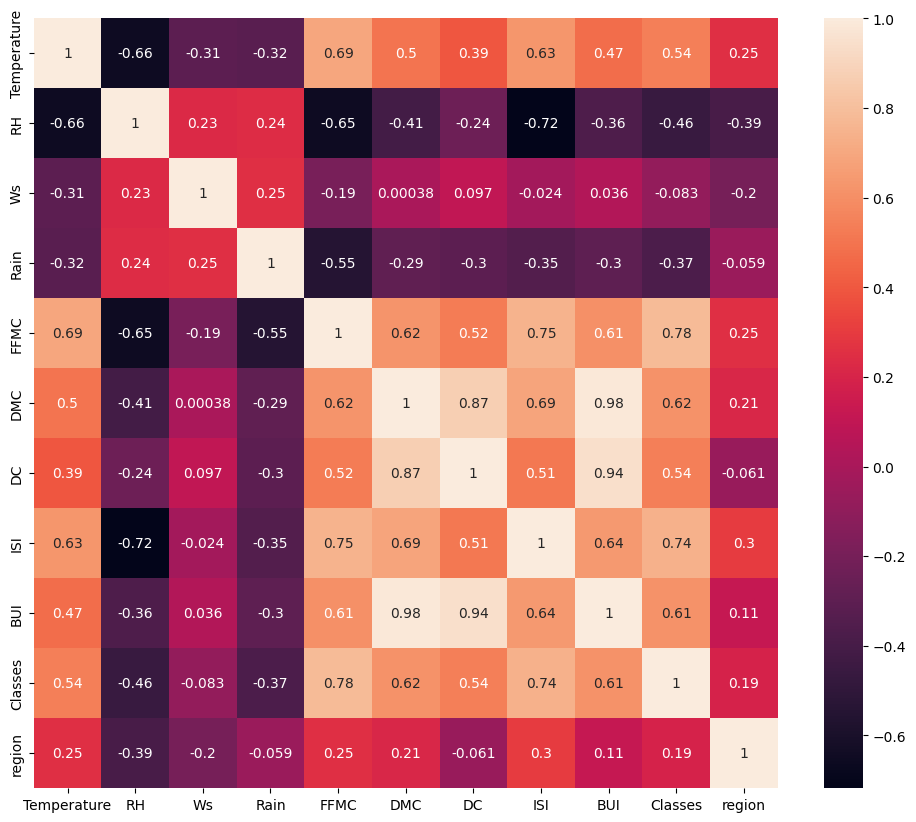

In [53]:
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr,annot = True)

In [54]:
def correlation(datasete,threshold):
    col_corr = set()
    corr_matrix = datasete.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [55]:
corr_feature = correlation(x_train,0.85)

In [56]:
corr_feature

{'BUI', 'DC'}

In [57]:
x_train.drop(corr_feature,axis =1, inplace=True)
x_test.drop(corr_feature,axis =1, inplace=True)

In [59]:
x_train.shape,x_test.shape

((182, 9), (61, 9))

## Standardization

In [60]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [61]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [63]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box plot to see effects of standard scaler

/tmp/ipykernel_20991/309611565.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X train after scaling')

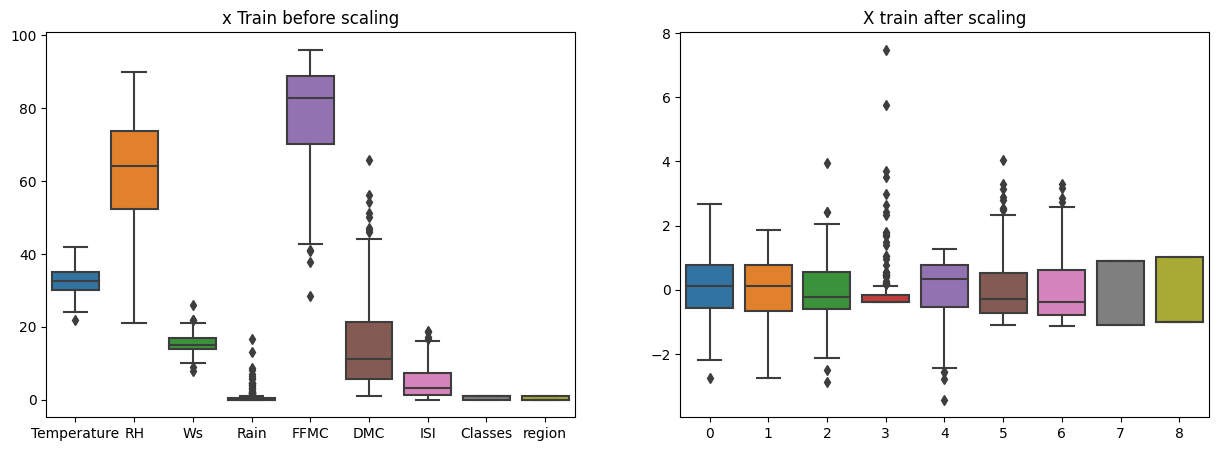

In [67]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x Train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title('X train after scaling')


## Linear regression model

Mean absolute error:  0.5468236465249986
R2 score:  0.9847657384266951


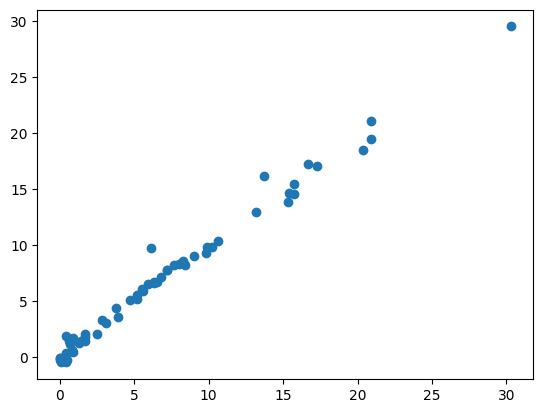

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linerg = LinearRegression()
linerg.fit(x_train_scaled,y_train)
y_pred = linerg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2 score: ',score)
plt.scatter(y_test,y_pred)

## Lasso

Mean absolute error:  1.133175994914409
R2 score:  0.9492020263112388


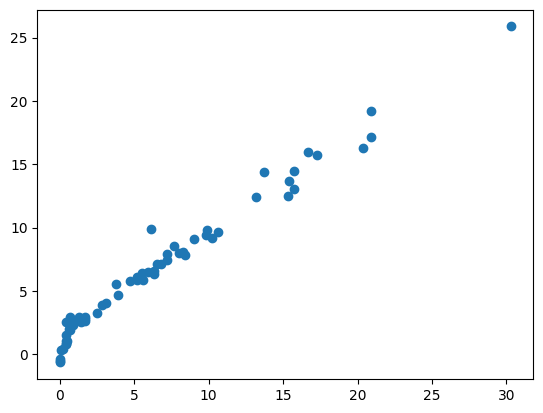

In [71]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2 score: ',score)
plt.scatter(y_test,y_pred)

## Cross Validation lasso

In [72]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error:  0.6199701158263433
R2 score:  0.9820946715928275


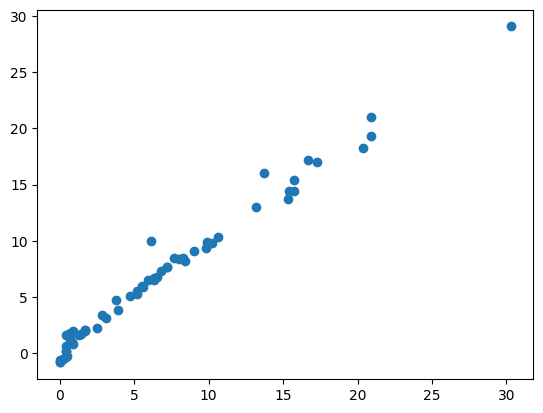

In [74]:
y_pred = lassocv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2 score: ',score)
plt.scatter(y_test,y_pred)

## Ridge regression model

Mean absolute error:  0.5642305340105692
R2 score:  0.9842993364555513


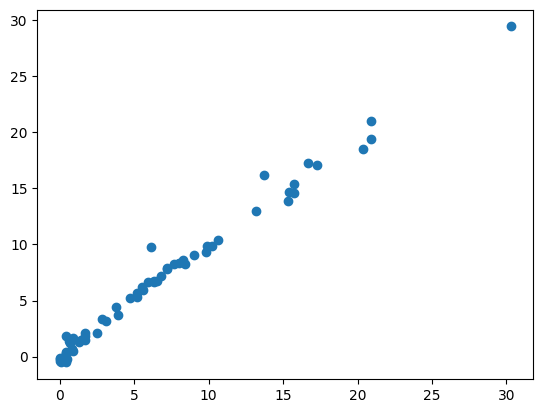

In [76]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2 score: ',score)
plt.scatter(y_test,y_pred)

Mean absolute error:  0.5642305340107913
R2 score:  0.9842993364555519


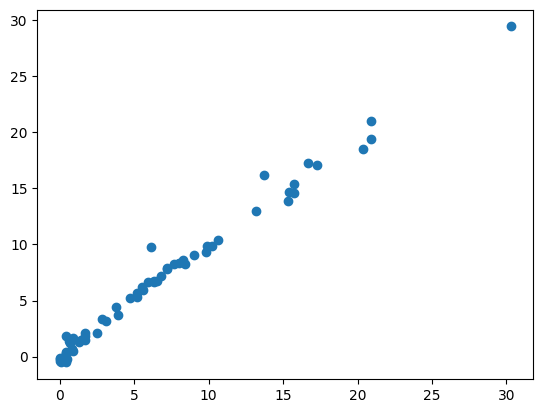

In [78]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(x_train_scaled,y_train)
y_pred = ridgecv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2 score: ',score)
plt.scatter(y_test,y_pred)

In [79]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elasticnet regression

Mean absolute error:  1.8822353634896005
R2 score:  0.8753460589519703


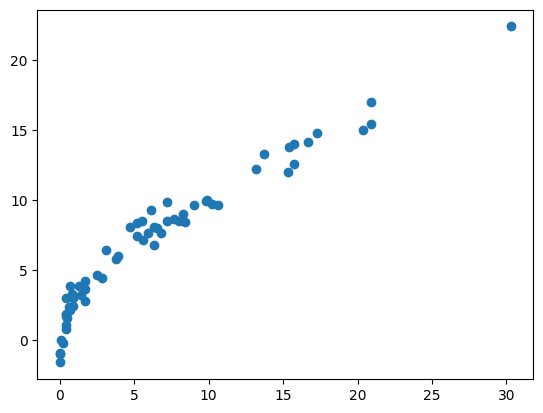

In [81]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred = elastic.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2 score: ',score)
plt.scatter(y_test,y_pred)

Mean absolute error:  0.6575946731430898
R2 score:  0.9814217587854941


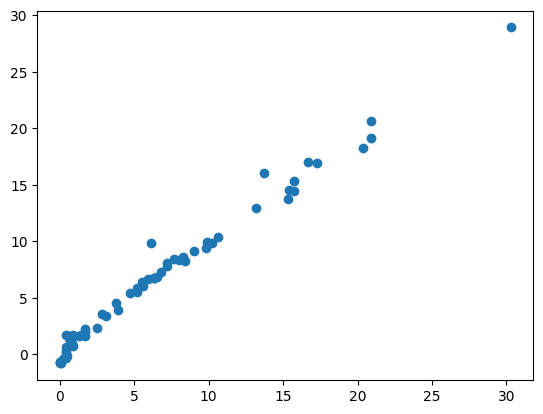

In [85]:
from sklearn.linear_model import ElasticNetCV
elasticv = ElasticNetCV()
elasticv.fit(x_train_scaled,y_train)
y_pred = elasticv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2 score: ',score)
plt.scatter(y_test,y_pred)

## pickle the machine learning

In [86]:
import pickle


In [88]:
scalar

StandardScaler()

In [89]:
    ridge

Ridge()

In [90]:
pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))